In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import cvxpy as cp

In [2]:
#tickers = ['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM',
#         'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APTV', 'ARE',
#         'ATO', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXON', 'AXP', 'AZO', 'BA', 'BAC', 'BALL', 'BAX', 'BBWI', 'BBY', 'BDX', 'BEN', 'BG', 'BIIB', 'BIO', 'BK', 'BKNG', 'BKR',
#         'BLK', 'BMY', 'BR', 'BRO', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CAT','CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDNS', 'CDW', 'CE', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR',
#         'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COO', 'COP', 'COST', 'CPB', 'CPRT', 'CPT', 'CRL', 'CRM', 'CSCO', 'CSGP',
#         'CSX', 'CTAS', 'CTLT', 'CTRA', 'CTSH', 'CVS', 'CVX', 'CZR', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DLR', 'DLTR', 'DOV', 'DPZ', 'DRI', 'DTE',
#         'DUK', 'DVA', 'DVN', 'DXC', 'DXCM', 'EA', 'EBAY', 'ECL', 'ED', 'EFX', 'EG', 'EIX', 'EL', 'ELV', 'EMN', 'EMR', 'ENPH', 'EOG', 'EPAM', 'EQIX', 'EQR', 'EQT', 'ES', 'ESS',
#         'ETN', 'ETR', 'ETSY', 'EVRG', 'EW', 'EXC', 'EXPD', 'EXPE', 'EXR', 'F', 'FANG', 'FAST', 'FCX', 'FDS', 'FDX', 'FE', 'FFIV', 'FI', 'FICO', 'FIS', 'FITB', 'FLT', 'FMC',
#         'FRT', 'FSLR', 'FTNT', 'GD', 'GE', 'GEN', 'GILD', 'GIS', 'GL', 'GLW', 'GM', 'GNRC', 'GOOG', 'GOOGL', 'GPC', 'GPN', 'GRMN', 'GS', 'GWW', 'HAL', 'HAS', 'HBAN', 'HCA', 'HD',
#         'HES', 'HIG', 'HII', 'HLT', 'HOLX', 'HON', 'HPQ', 'HRL', 'HSIC', 'HST', 'HSY', 'HUM', 'IBM', 'ICE', 'IDXX', 'IEX', 'IFF', 'ILMN', 'INCY', 'INTC', 'INTU', 'IP', 'IPG', 
#         'IQV', 'IRM', 'ISRG', 'IT', 'ITW', 'IVZ', 'J', 'JBHT', 'JCI', 'JKHY', 'JNJ', 'JNPR', 'JPM', 'K', 'KDP', 'KEY', 'KEYS', 'KHC', 'KIM', 'KLAC', 'KMB', 'KMI', 'KMX', 'KO',
#         'KR', 'L', 'LDOS', 'LEN', 'LH', 'LHX', 'LIN', 'LKQ', 'LLY', 'LMT', 'LNC', 'LNT', 'LOW', 'LRCX', 'LUV', 'LVS', 'LYB', 'LYV', 'MA', 'MAA', 'MAR', 'MAS', 'MCD', 'MCHP',
#         'MCK', 'MCO', 'MDLZ', 'MDT', 'MET', 'META', 'MGM', 'MHK', 'MKC', 'MKTX', 'MLM', 'MMC', 'MMM', 'MNST', 'MO', 'MOH', 'MOS', 'MPC', 'MPWR', 'MRK', 'MRO', 'MS', 'MSCI',
#         'MSFT', 'MSI', 'MTB', 'MTCH', 'MTD', 'MU', 'NCLH', 'NDAQ', 'NDSN', 'NEE', 'NEM', 'NFLX', 'NI', 'NKE', 'NOC', 'NOW', 'NRG', 'NSC', 'NTAP', 'NTRS', 'NUE', 'NVDA', 'NVR',
#         'NWL', 'NWS', 'NWSA', 'NXPI', 'O', 'ODFL', 'OKE', 'OMC', 'ON', 'ORCL', 'ORLY', 'OXY', 'PANW', 'PARA', 'PAYC', 'PAYX', 'PCAR', 'PCG', 'PEAK', 'PEG', 'PEP', 'PFE', 'PFG',
#         'PG', 'PGR', 'PH', 'PHM', 'PKG', 'PLD', 'PM', 'PNC', 'PNR', 'PNW', 'PODD', 'POOL', 'PPG', 'PPL', 'PRU', 'PSA', 'PSX', 'PTC', 'PWR', 'PXD', 'PYPL', 'QCOM', 'QRVO', 'RCL',
#         'REG', 'REGN', 'RF', 'RHI', 'RJF', 'RL', 'RMD', 'ROK', 'ROL', 'ROP', 'ROST', 'RSG', 'RTX', 'RVTY', 'SBAC', 'SBUX', 'SCHW', 'SEDG', 'SEE', 'SHW', 'SJM', 'SLB', 'SNA',
#         'SNPS', 'SO', 'SPG', 'SPGI', 'SRE', 'STE', 'STLD', 'STT', 'STX', 'STZ', 'SWK', 'SWKS', 'SYF', 'SYK', 'SYY', 'T', 'TAP', 'TDG', 'TDY', 'TECH', 'TEL', 'TER', 'TFC', 'TFX',
#         'TGT', 'TJX', 'TMO', 'TMUS', 'TPR', 'TRGP', 'TRMB', 'TROW', 'TRV', 'TSCO', 'TSLA', 'TSN', 'TT', 'TTWO', 'TXN', 'TXT', 'TYL', 'UAL', 'UDR', 'UHS', 'ULTA', 'UNH', 'UNP', 
#         'UPS', 'URI', 'USB', 'V', 'VFC', 'VLO', 'VMC', 'VRSK', 'VRSN', 'VRTX', 'VTR', 'VTRS', 'VZ', 'WAB', 'WAT', 'WBA', 'WBD', 'WDC', 'WEC', 'WELL', 'WFC', 'WHR', 'WM', 'WMB',
#         'WMT', 'WRB', 'WRK', 'WST', 'WTW', 'WY', 'WYNN', 'XEL', 'XOM', 'XRAY', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZION', 'ZTS']


In [3]:
#precios = yf.download(tickers, start="2020-01-01")['Adj Close']

[*********************100%%**********************]  481 of 481 completed


In [4]:
#activos = list(np.random.choice(tickers, 10))

In [4]:
activos = ['MPWR', 'APA', 'MOH', 'PCG', 'RL', 'IQV', 'ISRG', 'PSA', 'EG', 'HII']

In [5]:
precios = yf.download(activos, start="2020-01-01")['Adj Close']

[*********************100%%**********************]  10 of 10 completed


In [6]:
retornos = np.log(precios).diff().dropna()

In [7]:
retornos_esperados=retornos.mean().to_numpy()
matriz_cov = retornos.cov().to_numpy()

In [8]:
pesos = cp.Variable(len(activos))

restrictions = [pesos >= 0, cp.sum(pesos) == 1]

retornos_esperados = retornos.mean().to_numpy()

ret = retornos_esperados @ pesos

riesgo = cp.quad_form(pesos, matriz_cov)

objetivo = cp.Minimize(riesgo)

problema = cp.Problem(objetivo, restrictions)

solucion = problema.solve()

In [9]:
vol_min = np.sqrt(riesgo.value)
ret_min = ret.value
vol_min, ret_min

(0.014099468732423737, 0.00046750961953983687)

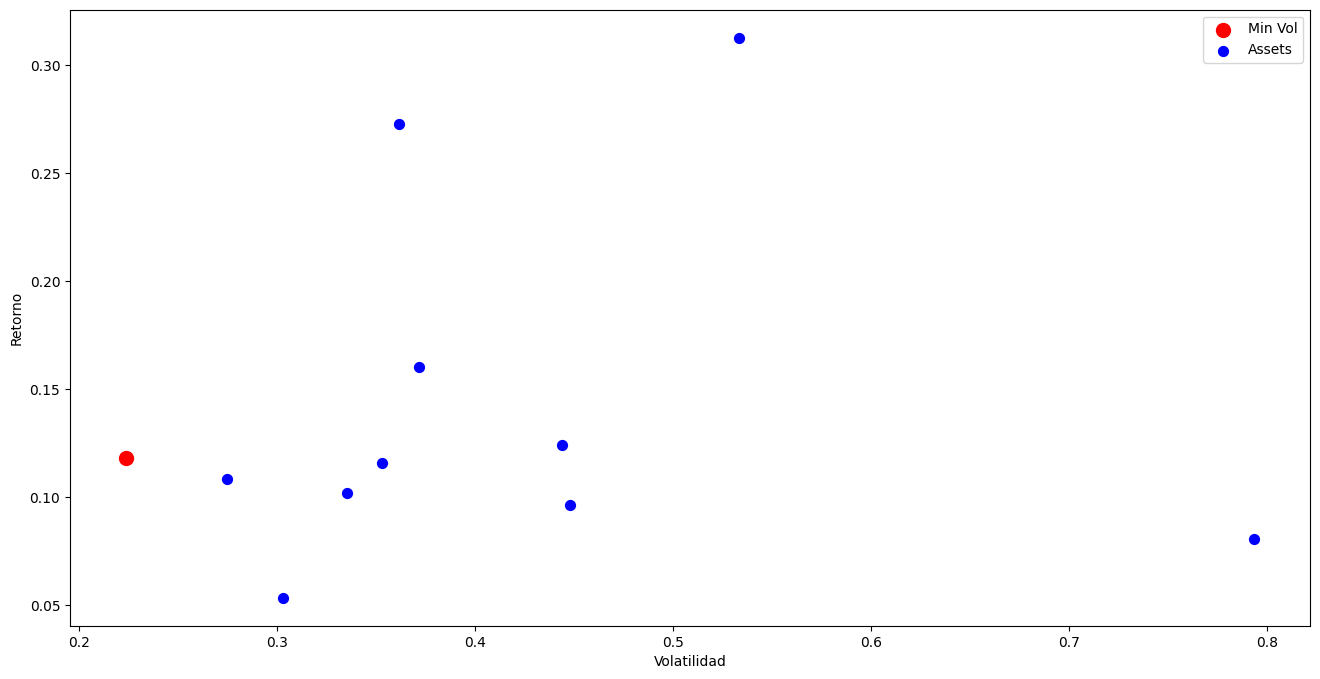

In [10]:
plt.figure(figsize=(16, 8))
plt.scatter(vol_min*np.sqrt(252), ret_min*252, c='r', marker='o', s = 100, label='Min Vol')
plt.scatter(retornos.std()*np.sqrt(252), retornos.mean()*252, c='b', marker='o', s = 50, label='Assets')
plt.xlabel('Volatilidad')
plt.ylabel('Retorno')
plt.legend()
plt.show()

In [12]:
retornos.std()

APA     0.049962
EG      0.021125
HII     0.019091
IQV     0.022218
ISRG    0.023423
MOH     0.022781
MPWR    0.033595
PCG     0.028200
PSA     0.017299
RL      0.027962
dtype: float64

In [11]:
vol_min

0.014099468732423737

In [13]:
riego_obj = 0.02


In [14]:
pesos = cp.Variable(len(activos))

riesgo = cp.quad_form(pesos, retornos.cov())

restrictions = [pesos >= 0,
                cp.sum(pesos) == 1,
                riesgo <= riego_obj**2]

retornos_esperados = retornos.mean().to_numpy()

ret = retornos_esperados @ pesos

objetivo = cp.Maximize(ret)

problema = cp.Problem(objetivo, restrictions)

solucion = problema.solve()

In [15]:
vol_cart_vol = np.sqrt(riesgo.value)
ret_cart_vol = ret.value


In [34]:
imax = np.argmax(retornos.mean(axis=0))
riesgos_lst = np.linspace(vol_cart_vol, np.sqrt(matriz_cov[imax, imax]), num=500)

In [35]:
retornos_lst = []
pesos_lst = []

for risk in riesgos_lst:
 #Variables de decisión
    pesos = cp.Variable(len(activos))

    # Función objetivo
    rentabilidad = cp.Maximize(retornos_esperados.T @ pesos)

    #Restricciones
    riesgo = cp.quad_form(pesos, matriz_cov)

    constraints = [pesos >= 0,
                    cp.sum(pesos) == 1,
                    riesgo <= risk**2
                    ]

    prob = cp.Problem(rentabilidad, constraints)
    resultado = prob.solve(solver=cp.ECOS)
    #resultado = prob.solve(solver=cp.MOSEK)
    retornos_lst.append(rentabilidad.value)
    pesos_lst.append(pesos.value)

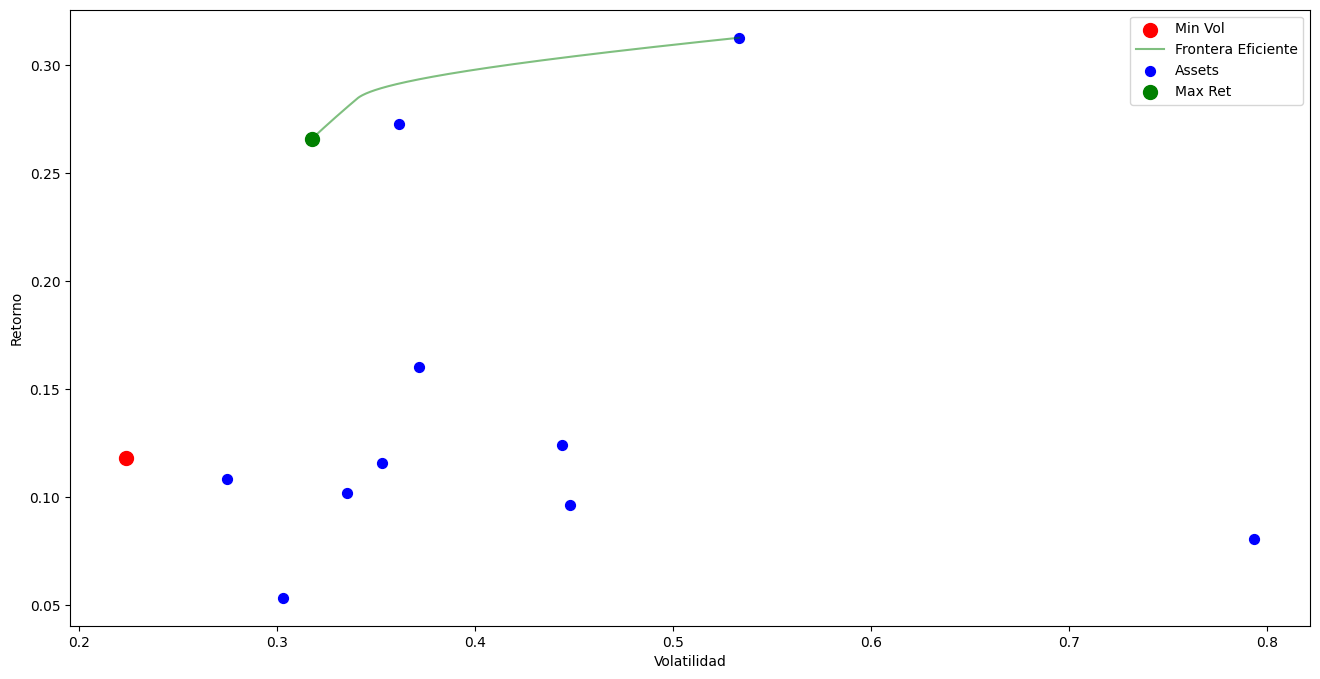

In [36]:
plt.figure(figsize=(16, 8))
plt.scatter(vol_min*np.sqrt(252), ret_min*252, c='r', marker='o', s = 100, label='Min Vol')
plt.plot(np.sqrt(252)*riesgos_lst, 252*np.array(retornos_lst), '-', color='green', label='Frontera Eficiente', alpha=0.5)
plt.scatter(retornos.std()*np.sqrt(252), retornos.mean()*252, c='b', marker='o', s = 50, label='Assets')
plt.scatter(vol_cart_vol*np.sqrt(252), ret_cart_vol*252, c='g', marker='o', s = 100, label='Max Ret')
plt.xlabel('Volatilidad')
plt.ylabel('Retorno')
plt.legend()
plt.show()

In [20]:
ret_obj = 0.25/252

In [21]:
pesos = cp.Variable(len(activos))

riesgo = cp.quad_form(pesos, retornos.cov())

retornos_esperados = retornos.mean().to_numpy()
ret = retornos_esperados @ pesos

restrictions = [pesos >= 0,
                cp.sum(pesos) == 1,
                ret >= ret_obj]


objetivo = cp.Minimize(riesgo)

problema = cp.Problem(objetivo, restrictions)

solucion = problema.solve()

In [22]:
vol_cart_ret = np.sqrt(riesgo.value)
ret_cart_ret = ret.value

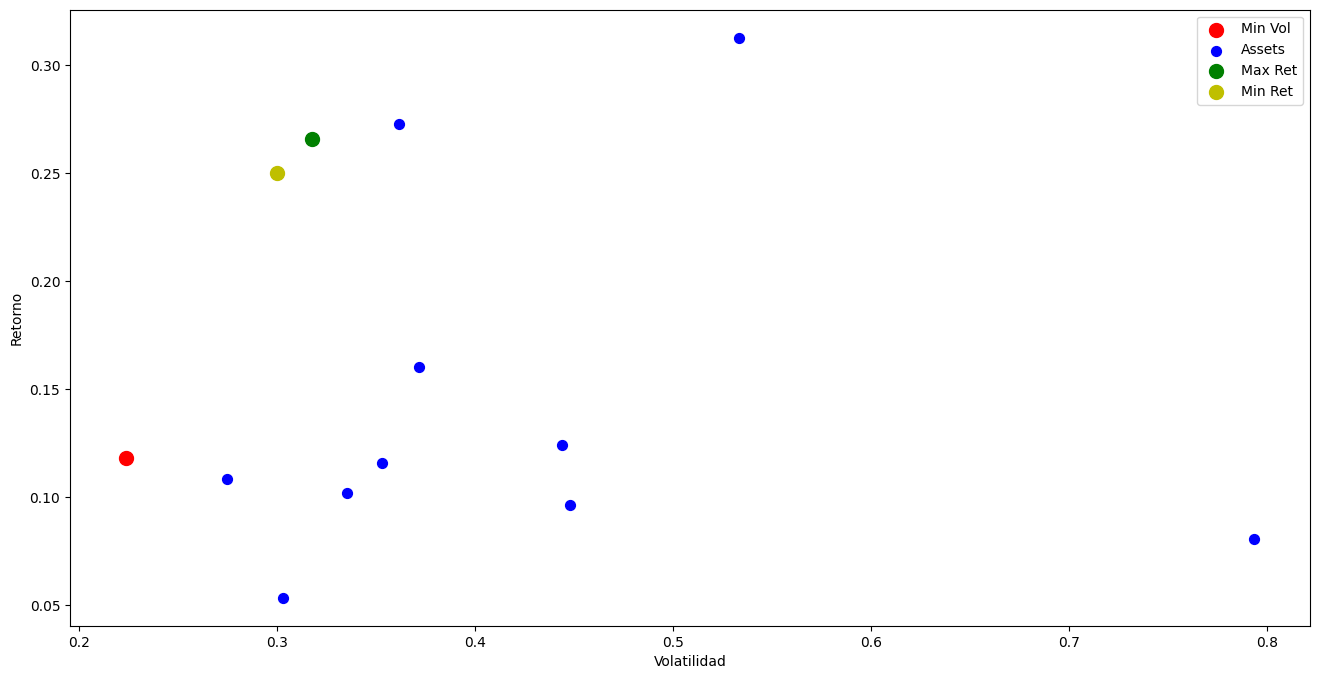

In [23]:
plt.figure(figsize=(16, 8))
plt.scatter(vol_min*np.sqrt(252), ret_min*252, c='r', marker='o', s = 100, label='Min Vol')
plt.scatter(retornos.std()*np.sqrt(252), retornos.mean()*252, c='b', marker='o', s = 50, label='Assets')
plt.scatter(vol_cart_vol*np.sqrt(252), ret_cart_vol*252, c='g', marker='o', s = 100, label='Max Ret')
plt.scatter(vol_cart_ret*np.sqrt(252), ret_cart_ret*252, c='y', marker='o', s = 100, label='Min Ret')
plt.xlabel('Volatilidad')
plt.ylabel('Retorno')
plt.legend()
plt.show()

In [24]:
ret_rf = 0.02/252

In [27]:
x = cp.Variable(len(activos))
# Riesgo (desviación estándar) del portafolio
riesgo = cp.quad_form(x, matriz_cov)

#Cálculo de pi como retornos esperados menos la rantabilidad del activo libre de riesgo
pi = retornos_esperados - ret_rf

#Restricciones
constraints = [pi @ x ==1, # para que el numerador sea 1
               x>=0]       # sin posiciones cortas

objective = cp.Minimize(riesgo) # Minimizo el riesgo

# Problema de optimización
problema = cp.Problem(objective, constraints)        

# Resolver el problema
resultado  = problema.solve(solver=cp.ECOS)#, verbose=True)

In [29]:
# Normalizo los pesos
pesos = x.value
pesos /= pesos.sum()

pesos_df = pd.DataFrame(pesos, index=activos)

In [31]:
pesos_ajustados = np.array([np.round(x, 3) if x > 10**-4 else 0  for x in pesos_df[0]])
activos_filtrados = [asset for i, asset in enumerate(activos) if pesos_ajustados[i] > 0]
pesos_filtrados = [x for x in pesos_ajustados if x > 0]

In [32]:
retorno_cart_sharpe = np.dot(retornos_esperados, pesos_ajustados)*252
std_sharpe = np.sqrt(pesos_ajustados @ matriz_cov @ pesos_ajustados.T)*np.sqrt(252)

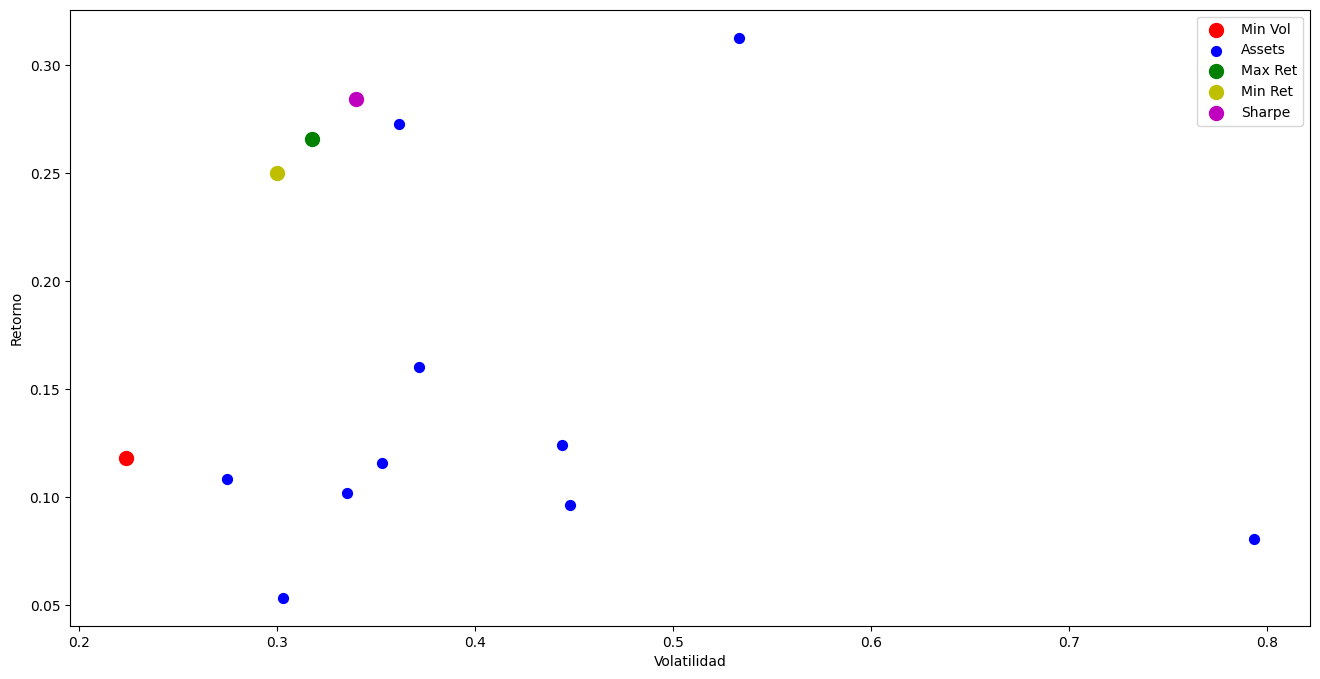

In [33]:
plt.figure(figsize=(16, 8))
plt.scatter(vol_min*np.sqrt(252), ret_min*252, c='r', marker='o', s = 100, label='Min Vol')
plt.scatter(retornos.std()*np.sqrt(252), retornos.mean()*252, c='b', marker='o', s = 50, label='Assets')
plt.scatter(vol_cart_vol*np.sqrt(252), ret_cart_vol*252, c='g', marker='o', s = 100, label='Max Ret')
plt.scatter(vol_cart_ret*np.sqrt(252), ret_cart_ret*252, c='y', marker='o', s = 100, label='Min Ret')
plt.scatter(std_sharpe, retorno_cart_sharpe, c='m', marker='o', s = 100, label='Sharpe')
plt.xlabel('Volatilidad')
plt.ylabel('Retorno')
plt.legend()
plt.show()